In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [44]:
df=pd.read_csv("D:/Dataset/Mall_Customers.csv")

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [48]:
df.drop(df[["CustomerID"]],inplace=True,axis=1)

In [49]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [50]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot: ylabel='Density'>

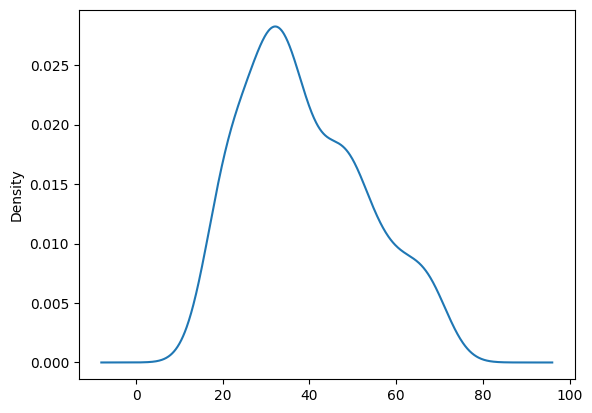

In [51]:
df["Age"].plot(kind="kde")

In [52]:
df["Age"].skew()

0.48556885096681657

<AxesSubplot: >

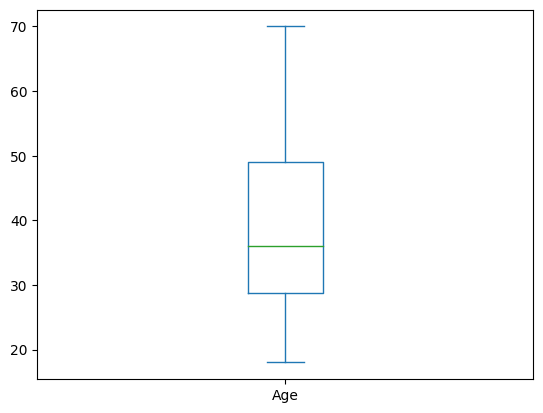

In [53]:
df["Age"].plot(kind="box")

<AxesSubplot: ylabel='Density'>

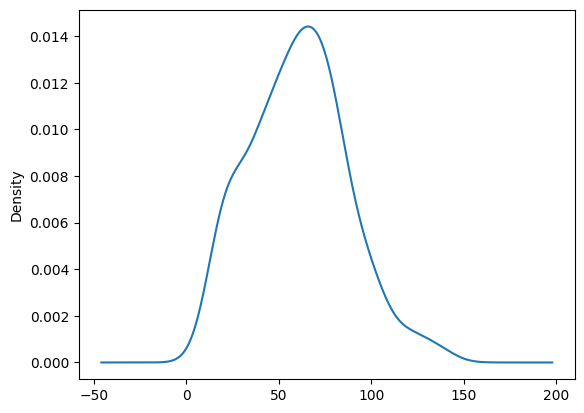

In [54]:
df["Annual Income (k$)"].plot(kind="kde")

In [55]:
df["Annual Income (k$)"].skew()

0.3218425498619055

<AxesSubplot: >

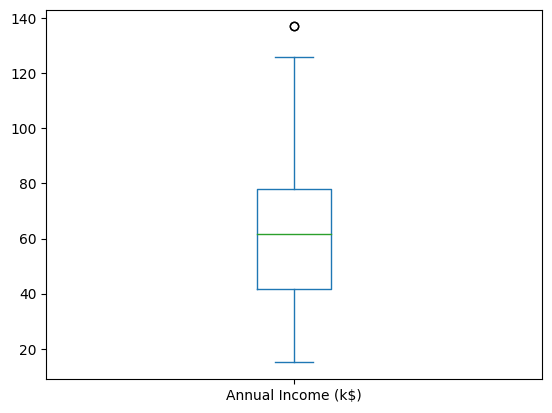

In [56]:
df["Annual Income (k$)"].plot(kind="box")

In [57]:
df[df["Annual Income (k$)"]>130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


<AxesSubplot: ylabel='Density'>

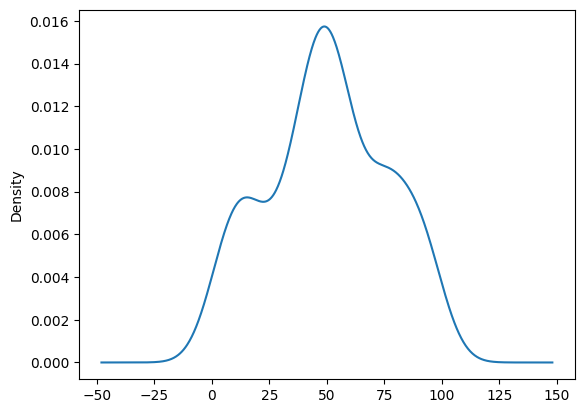

In [58]:
df["Spending Score (1-100)"].plot(kind="kde")

In [59]:
df["Spending Score (1-100)"].skew()

-0.047220201374263374

<AxesSubplot: >

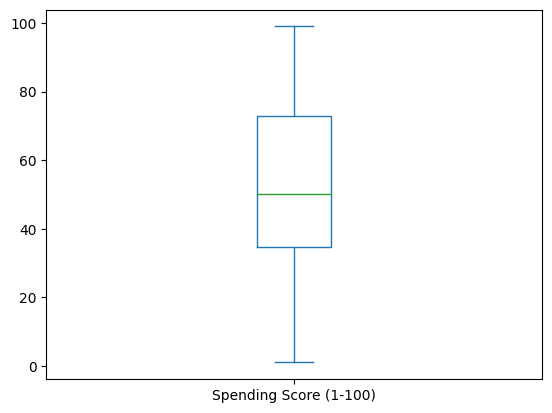

In [60]:
df["Spending Score (1-100)"].plot(kind="box")

In [61]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

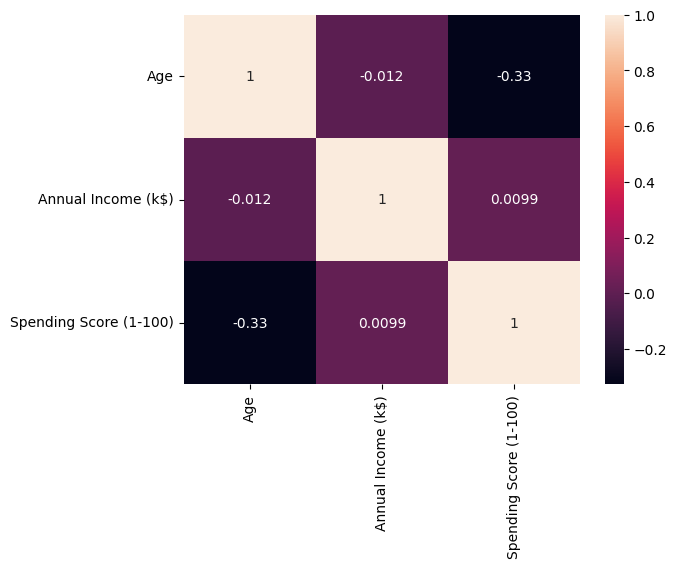

In [62]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

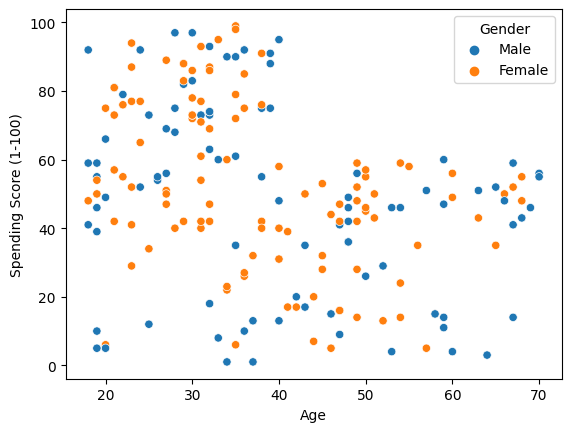

In [63]:
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"],hue=df["Gender"])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

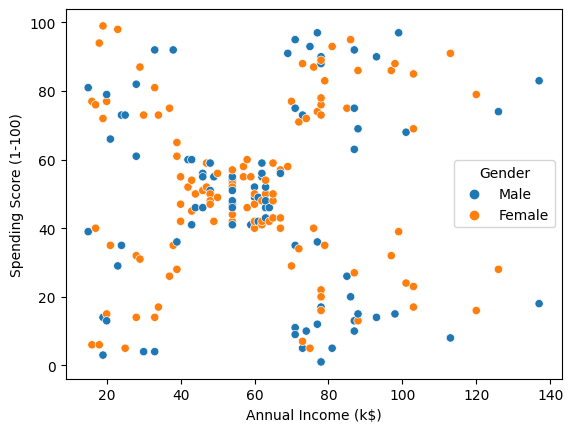

In [64]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=df["Gender"])

<AxesSubplot: xlabel='Gender', ylabel='Spending Score (1-100)'>

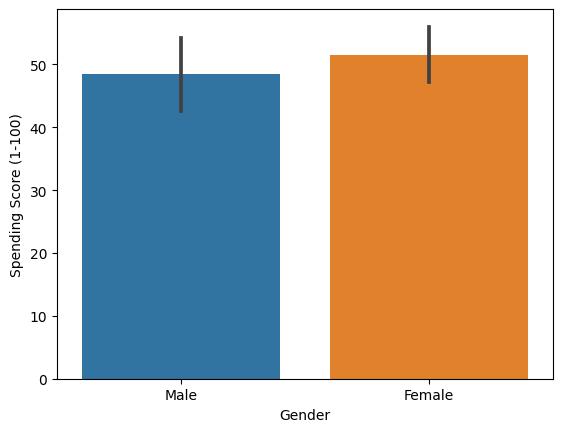

In [65]:
sns.barplot(x=df["Gender"],y=df["Spending Score (1-100)"])

<AxesSubplot: xlabel='Gender', ylabel='Age'>

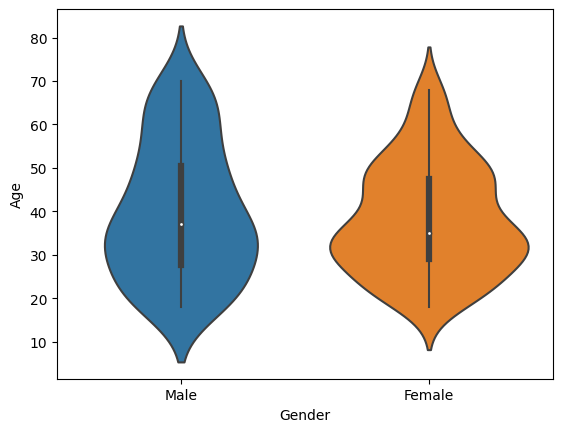

In [66]:
sns.violinplot(x=df["Gender"],y=df["Age"])

In [69]:
# We can find that There is no perticular relationship between Gender and spending score, instead we can find
# relations between annual income and speanding score, so we can group the customers on the basis of Annual Income and spending score

In [70]:
x1=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [71]:
x1=x1.values

# K means

In [72]:
from sklearn.cluster import KMeans

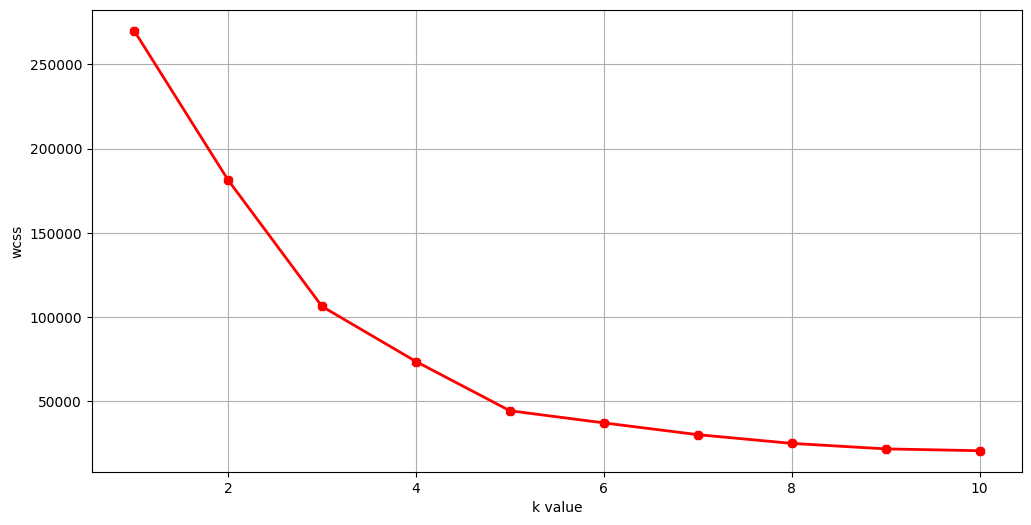

In [73]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()
    
    

In [74]:
kmeans = KMeans(n_clusters=5)

In [75]:
km_pred=kmeans.fit_predict(x1)

In [76]:
km_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [77]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [78]:
df["cluster"]=km_pred

In [79]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,1
197,Male,32,126,74,3
198,Male,32,137,18,1


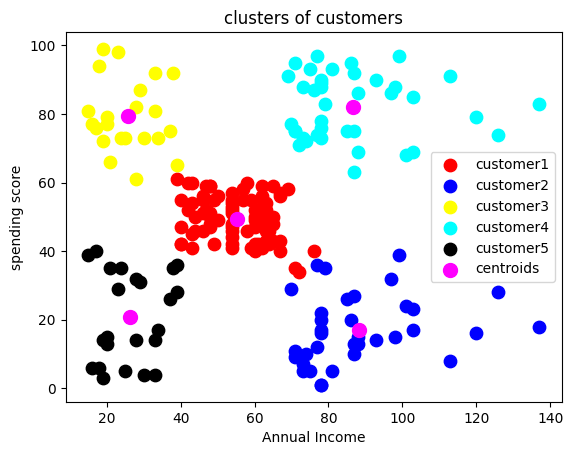

In [80]:
plt.scatter(x1[km_pred==0,0],x1[km_pred==0,1],s=80,c="red",label="customer1")
plt.scatter(x1[km_pred==1,0],x1[km_pred==1,1],s=80,c="blue",label="customer2")
plt.scatter(x1[km_pred==2,0],x1[km_pred==2,1],s=80,c="yellow",label="customer3")
plt.scatter(x1[km_pred==3,0],x1[km_pred==3,1],s=80,c="cyan",label="customer4")
plt.scatter(x1[km_pred==4,0],x1[km_pred==4,1],s=80,c="black",label="customer5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="magenta",label="centroids")
plt.title("clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.legend()
plt.show()


In [81]:
from sklearn.metrics import silhouette_score
silhouette_score(x1,km_pred)

0.553931997444648

# Agglomrative clustering

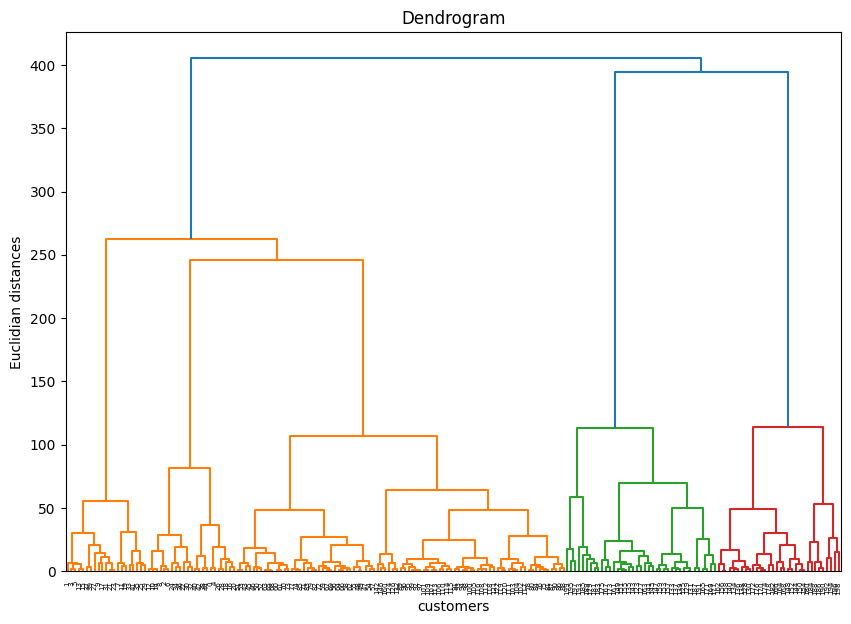

In [82]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(x1,method="ward"))
plt.title("Dendrogram")
plt.xlabel("customers")
plt.ylabel("Euclidian distances")
plt.show()

In [84]:
# here we can say that right blue line is the line with maximunm length hence the horizontal line line cutting
# the right blue line is cutting two points, hence k=5


In [85]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5)
ag_pred=cluster.fit_predict(x1)

In [86]:
ag_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
silhouette_score(x1,ag_pred)

0.5529945955148897

In [89]:
# dropping cluster createtd by k means algo
df.drop(["cluster"],axis=1,inplace=True)

In [90]:
# adding cluster created by agglomerative clustering
df["cluster"]=ag_pred

In [91]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


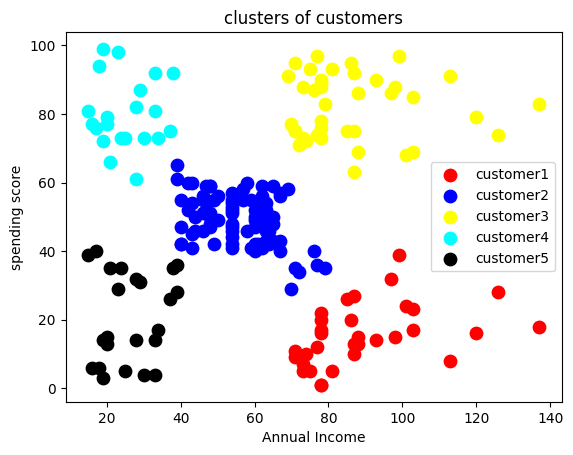

In [92]:
plt.scatter(x1[ag_pred==0,0],x1[ag_pred==0,1],s=80,c="red",label="customer1")
plt.scatter(x1[ag_pred==1,0],x1[ag_pred==1,1],s=80,c="blue",label="customer2")
plt.scatter(x1[ag_pred==2,0],x1[ag_pred==2,1],s=80,c="yellow",label="customer3")
plt.scatter(x1[ag_pred==3,0],x1[ag_pred==3,1],s=80,c="cyan",label="customer4")
plt.scatter(x1[ag_pred==4,0],x1[ag_pred==4,1],s=80,c="black",label="customer5")
plt.title("clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.legend()
plt.show()

# DB scan 

In [93]:
from sklearn.neighbors import NearestNeighbors
neight=NearestNeighbors(n_neighbors=2)
nbrs=neight.fit(x1)
distances,indices=nbrs.kneighbors(x1)

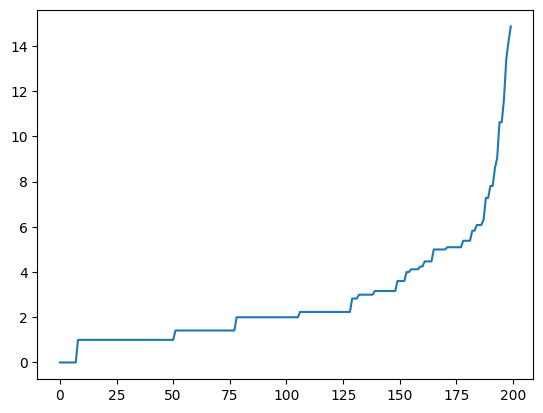

In [94]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [95]:
from sklearn.cluster import DBSCAN
dbcluster = DBSCAN(eps=9, min_samples=5).fit(x1)

In [96]:
dbc_pred=dbcluster.fit_predict(x1)

In [97]:
dbc_pred

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1, -1,
        1,  0,  1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [98]:
#removing cluster column from Agglomerative algo
df.drop(["cluster"],axis=1,inplace=True)

In [99]:
#adding cluster column from dbc algo
df["cluster"]=dbc_pred

In [100]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,-1
196,Female,45,126,28,-1
197,Male,32,126,74,-1
198,Male,32,137,18,-1


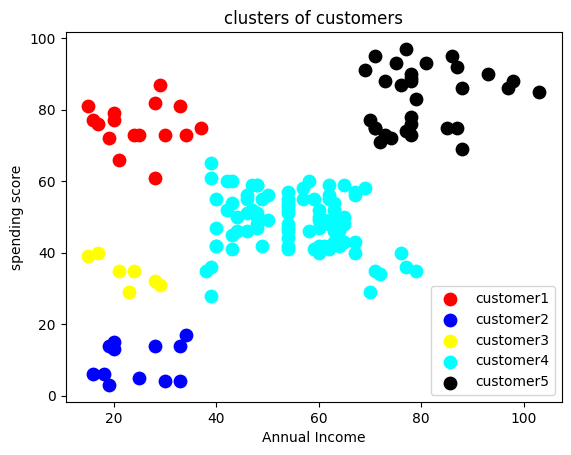

In [101]:
plt.scatter(x1[dbc_pred==0,0],x1[dbc_pred==0,1],s=80,c="red",label="customer1")
plt.scatter(x1[dbc_pred==1,0],x1[dbc_pred==1,1],s=80,c="blue",label="customer2")
plt.scatter(x1[dbc_pred==2,0],x1[dbc_pred==2,1],s=80,c="yellow",label="customer3")
plt.scatter(x1[dbc_pred==3,0],x1[dbc_pred==3,1],s=80,c="cyan",label="customer4")
plt.scatter(x1[dbc_pred==4,0],x1[dbc_pred==4,1],s=80,c="black",label="customer5")
plt.title("clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.legend()
plt.show()

In [102]:
silhouette_score(x1,dbc_pred)

0.43598431858196485

In [105]:
#This is worst clustering, since it keeps the noise outside

In [106]:
#Note: Lets try by scaling the data if any changes are present

In [107]:
#lets normalize the data

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1_scaled=scaler.fit_transform(x1)

In [34]:
from sklearn.cluster import KMeans

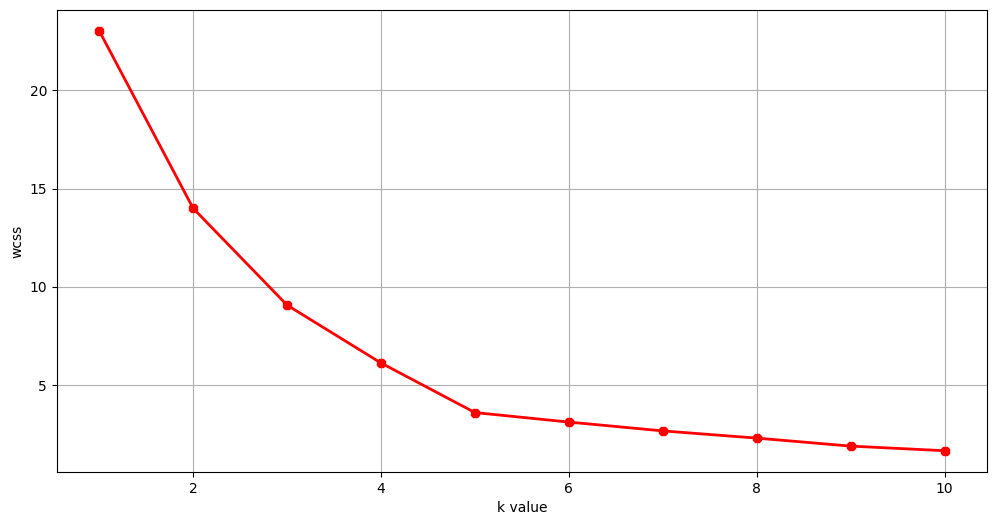

In [110]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
    kmeans.fit(x1_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=2)

In [40]:
label2=kmeans.fit_predict(x1)

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(x1,label2)

0.2968969162503008

In [111]:
from sklearn.preprocessing import normalize
scaled=normalize(x1)
scaled=pd.DataFrame(x1)
scaled.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


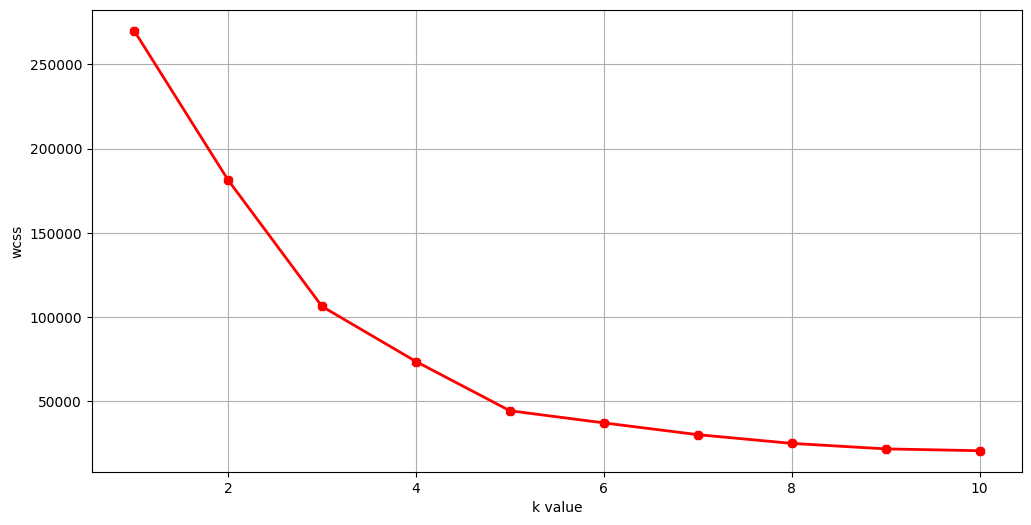

In [112]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

In [113]:
kmeans = KMeans(n_clusters=4)

In [114]:
km2_pred=kmeans.fit_predict(x1)

In [149]:
km2_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [115]:
from sklearn.metrics import silhouette_score
silhouette_score(x1,km2_pred)

0.4931963109249047

In [116]:
# we tried by scaling the data but score remains same..

In [ ]:
Conclusion:
    We can say that in k Means and agglomerative we are getting the best silhoutte_score...cell no. 82 gives the complete
    5 groups of customers to target.